# Import useful packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
data_pur= pd.read_csv('/kaggle/input/dataclean/data.csv')
data_pur


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# 1- Data exploration and cleaning

In [4]:
data_pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [80]:
#Split features into two typs(numeric and categoric)

num_features=data_pur.select_dtypes(include=['int64','float64']).columns
cat_features= data_pur.select_dtypes(include='object').columns


In [6]:
num_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
cat_features

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
data_pur[num_features].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Missing_values identifications

In [9]:
import missingno as msno

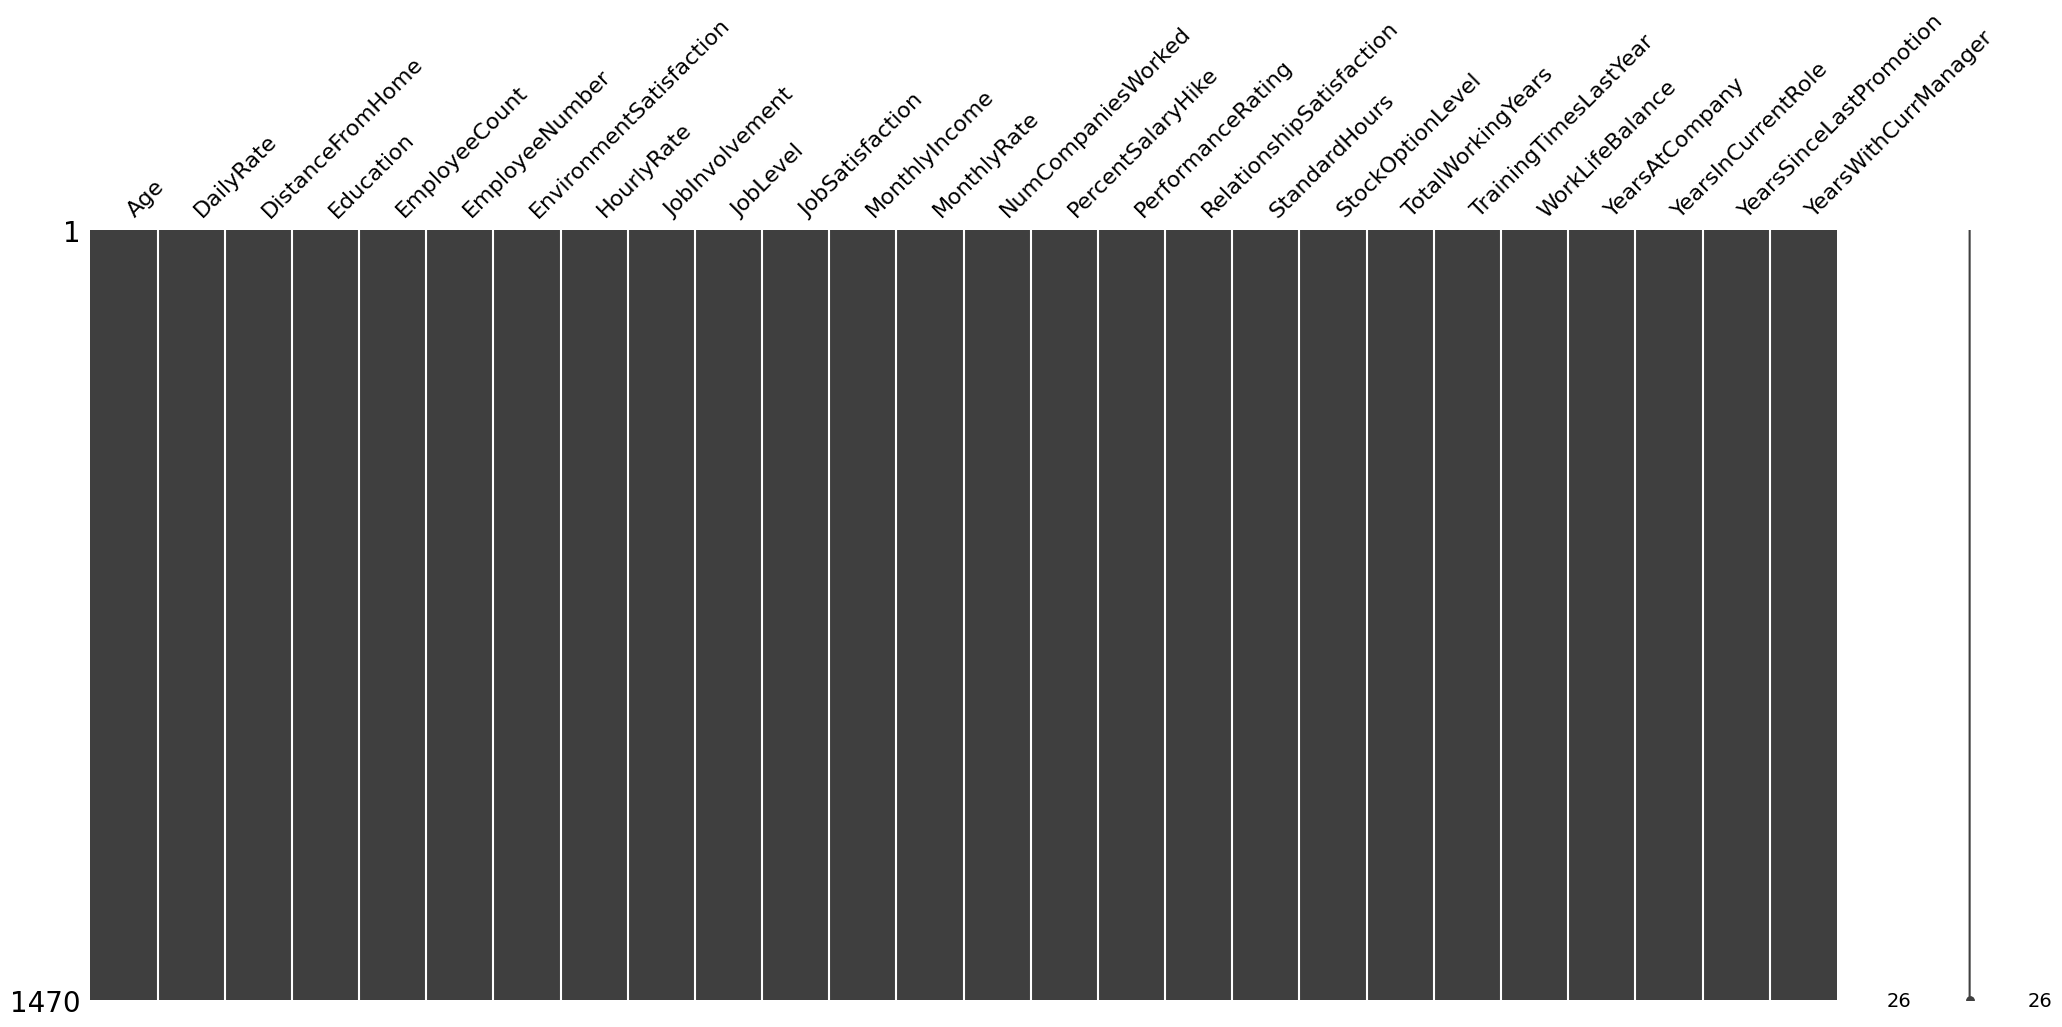

In [10]:
msno.matrix(data_pur[num_features])
plt.show()

No missing values detected here....

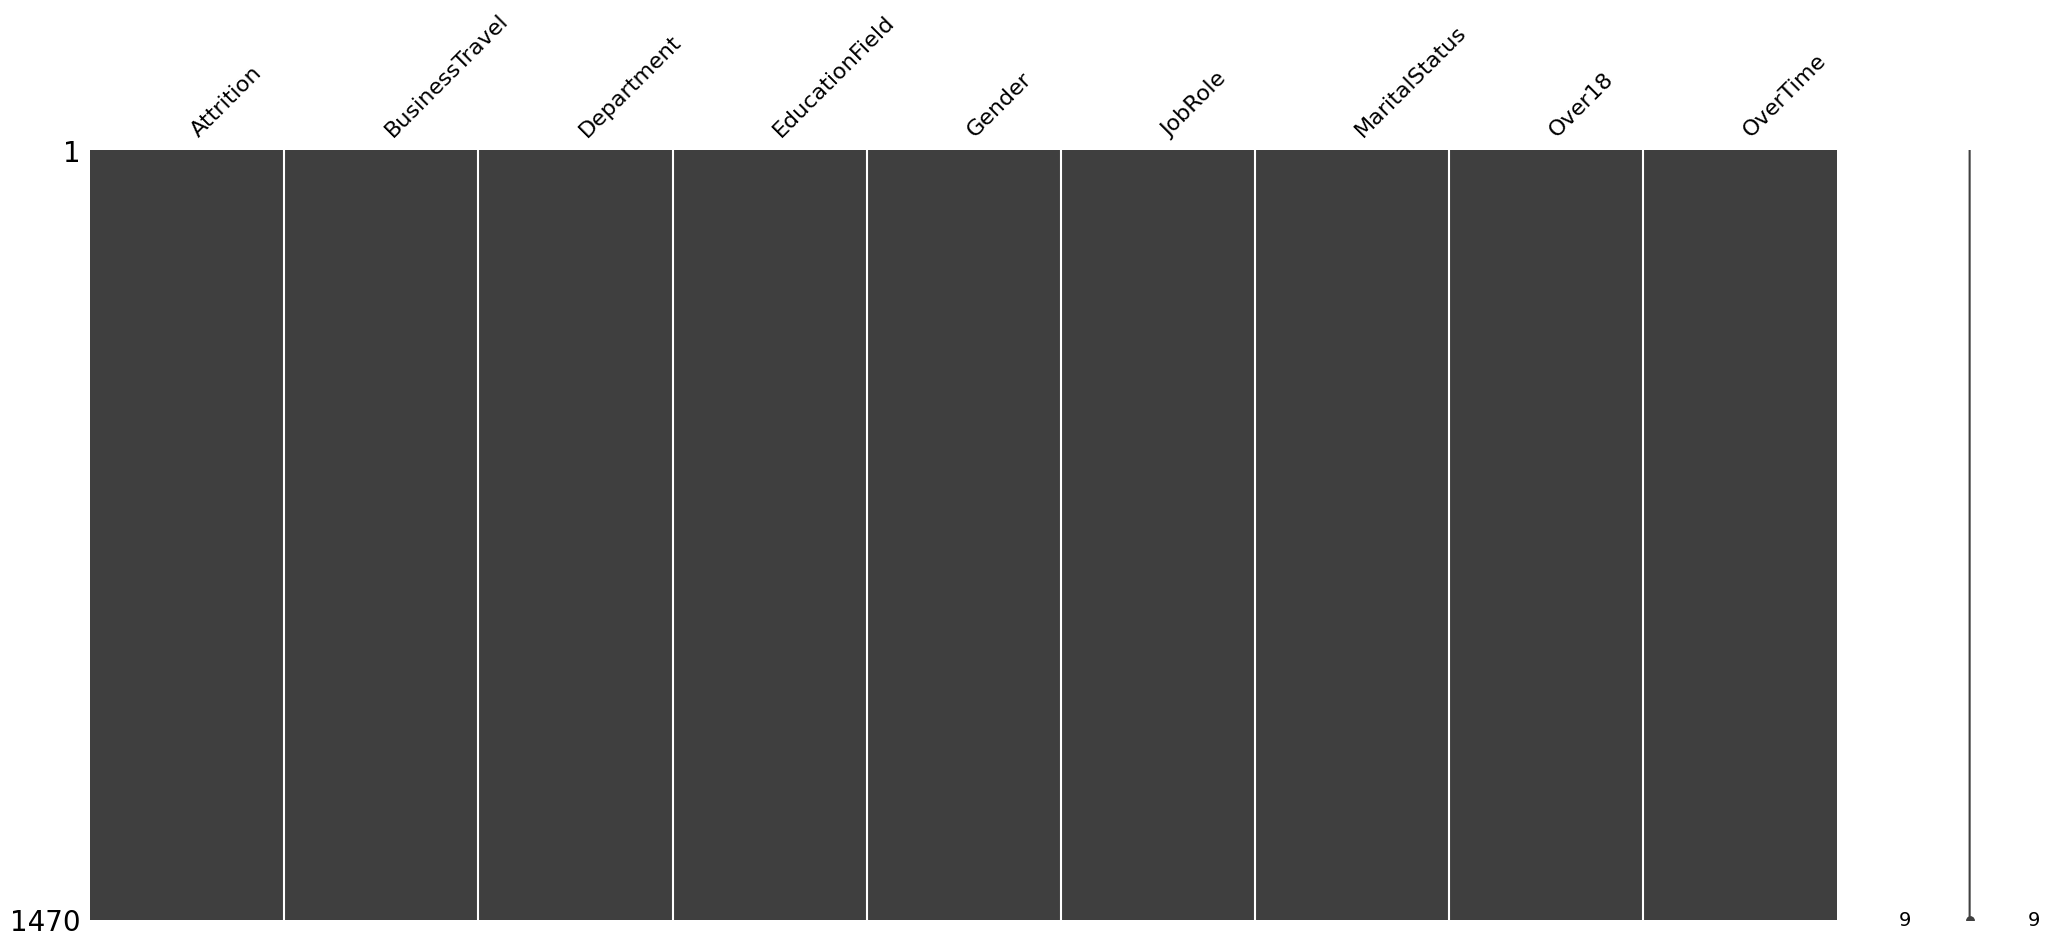

In [11]:
msno.matrix(data_pur[cat_features])
plt.show()

No missing_values detected here , too

### Outliers identification

In [14]:
def detect_outliers(data, features):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=features)
    plt.xlabel(f'{features}')
    plt.title(f"Boxplot des {features}")
    plt.show()

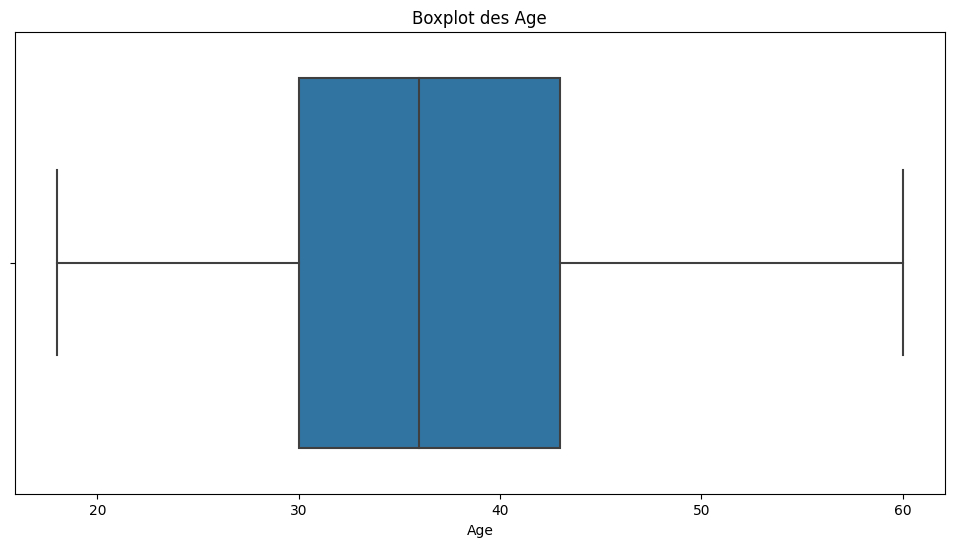

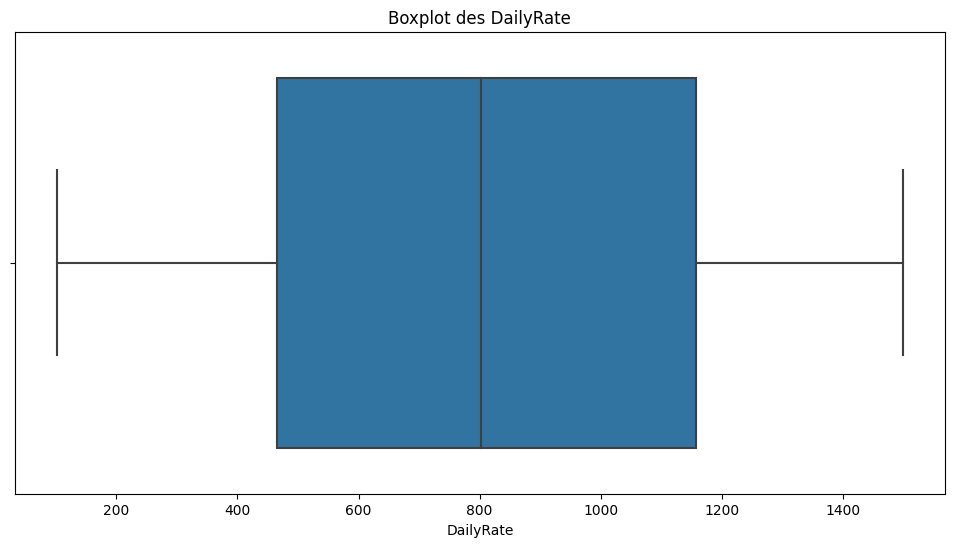

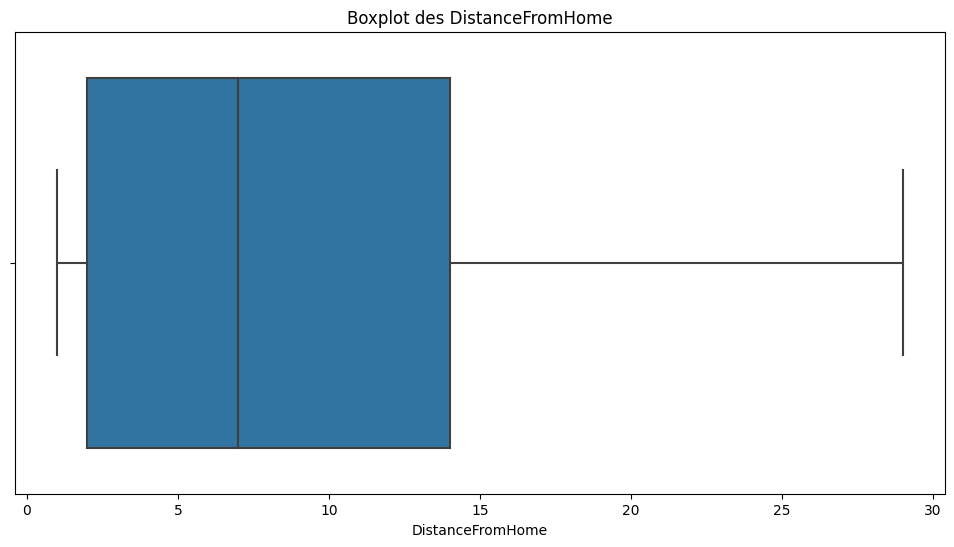

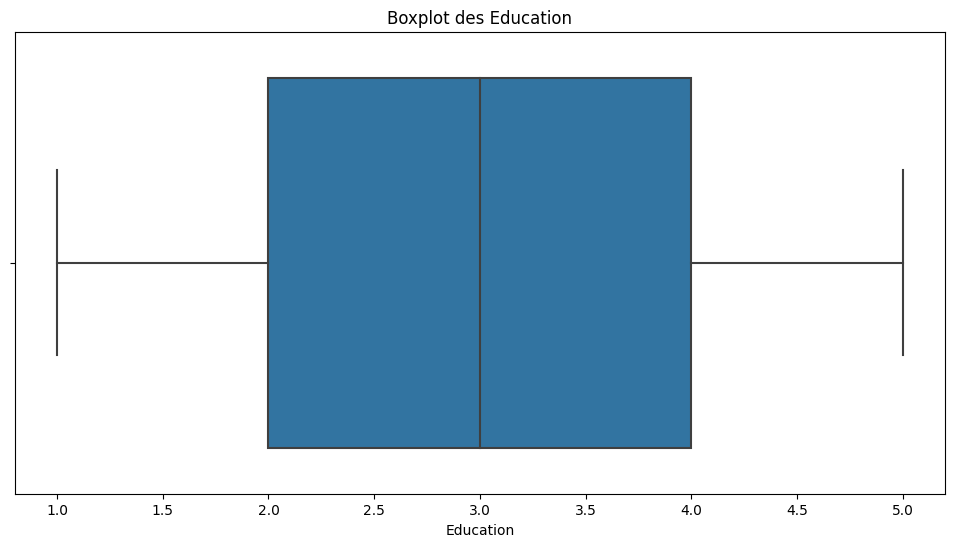

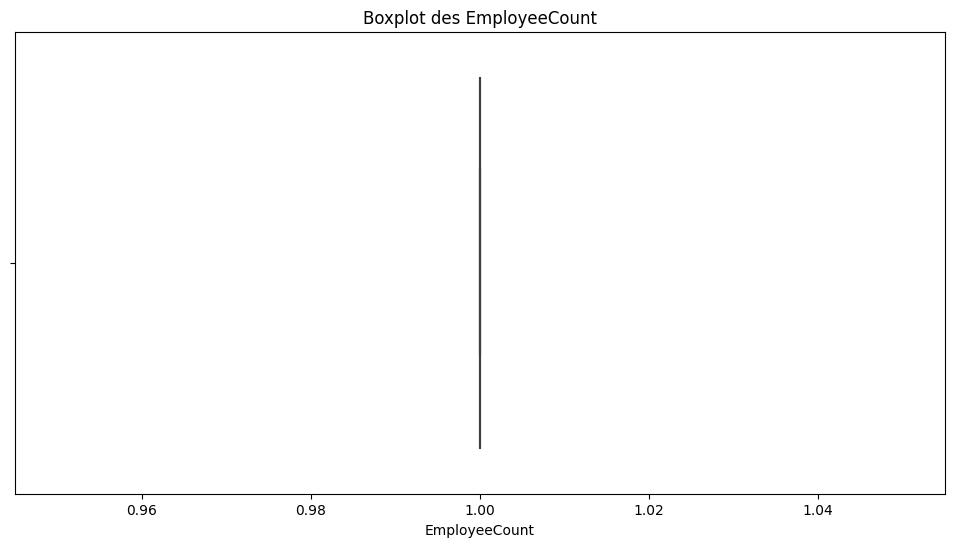

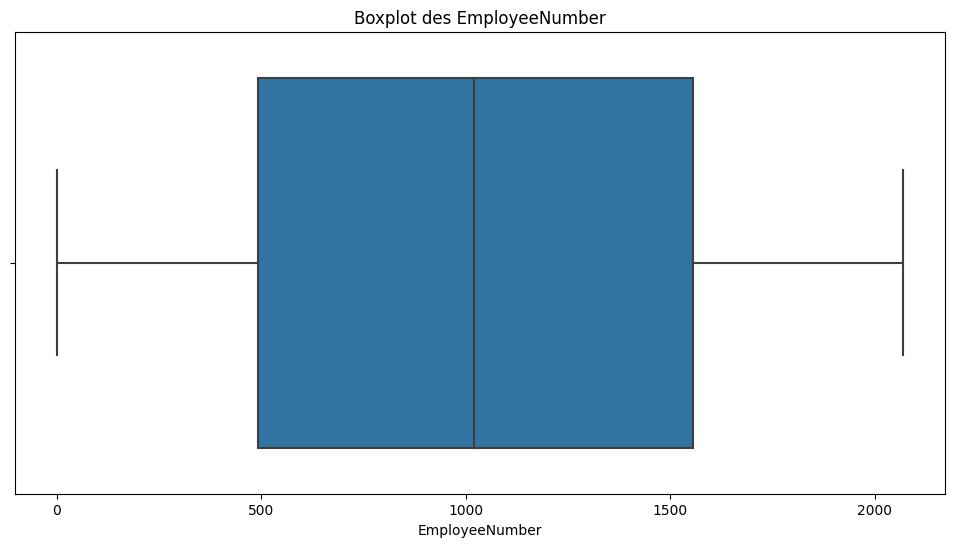

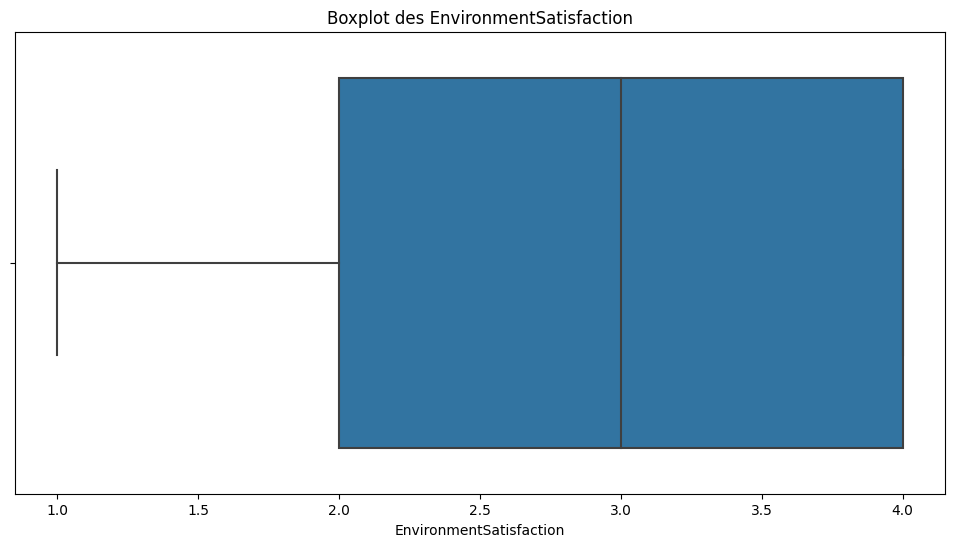

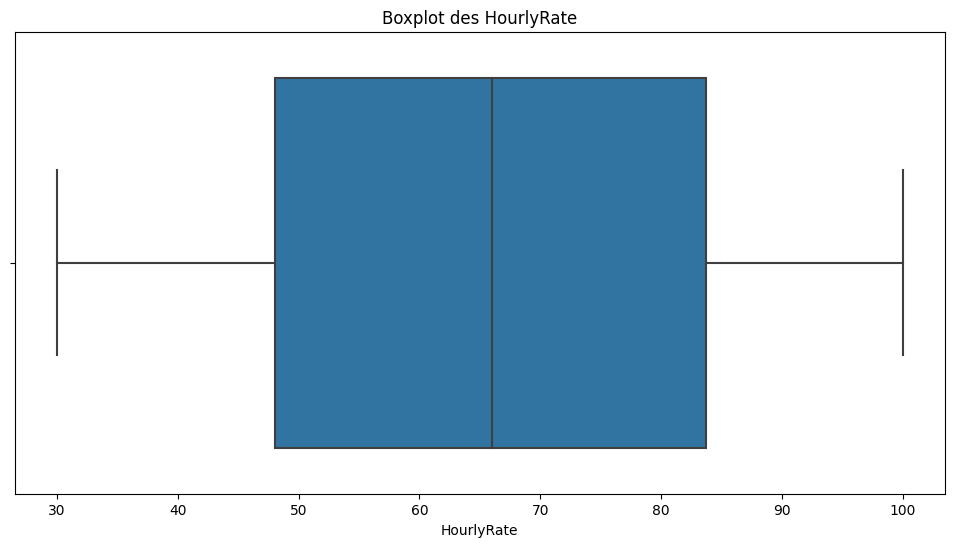

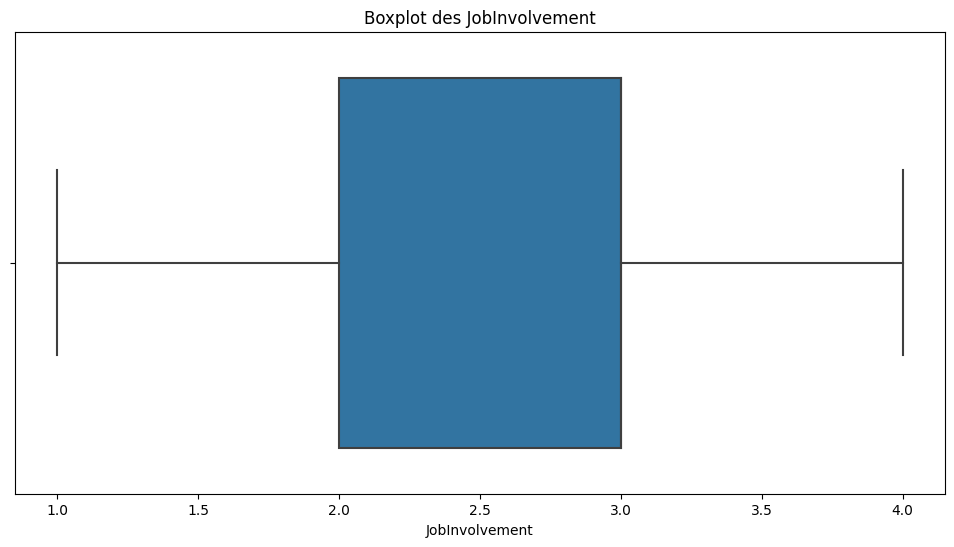

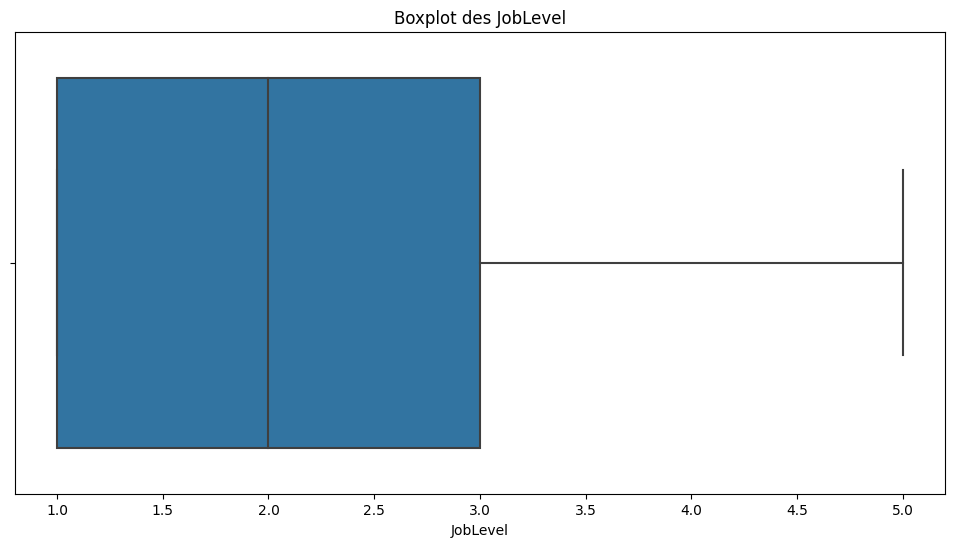

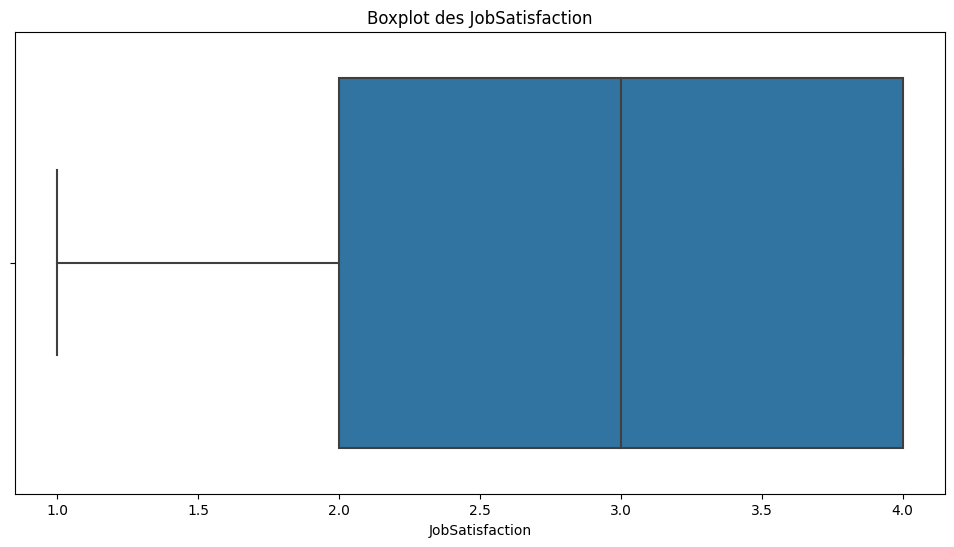

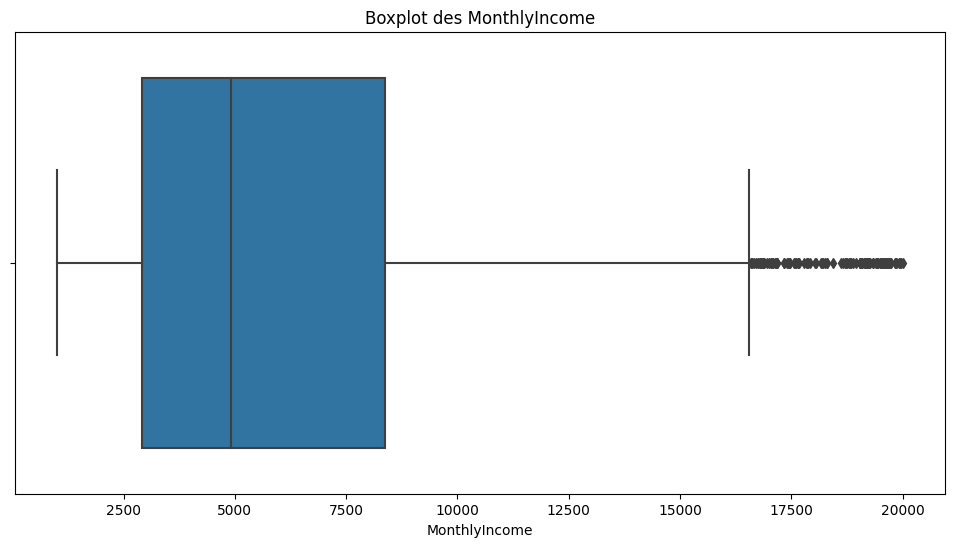

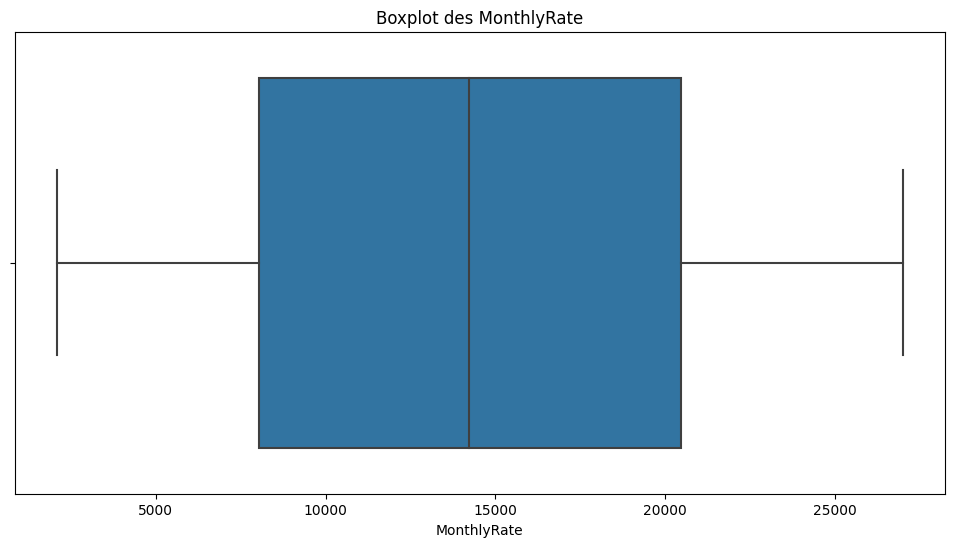

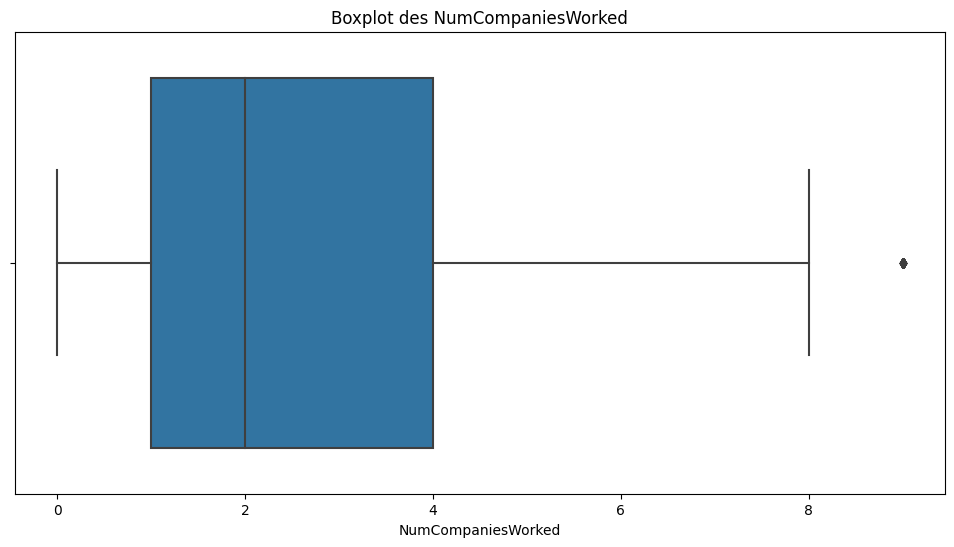

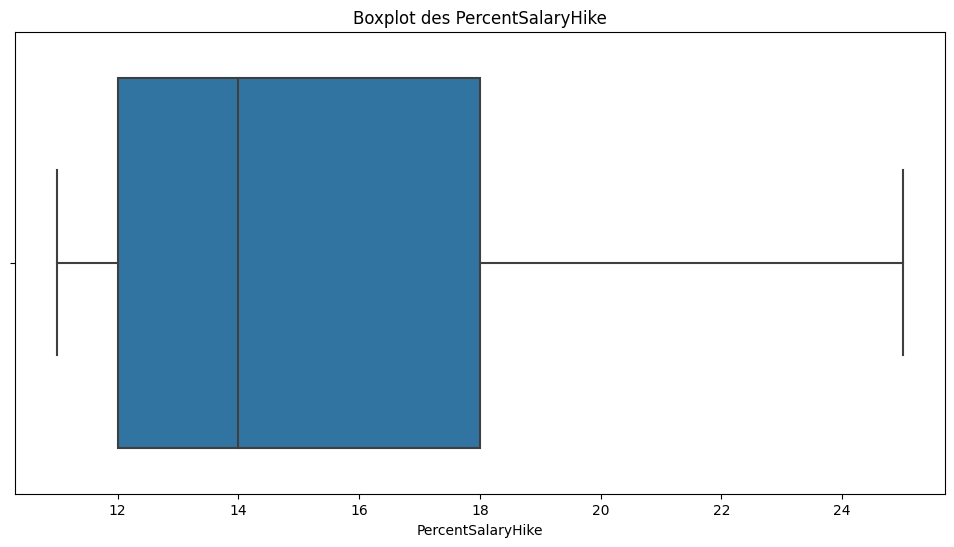

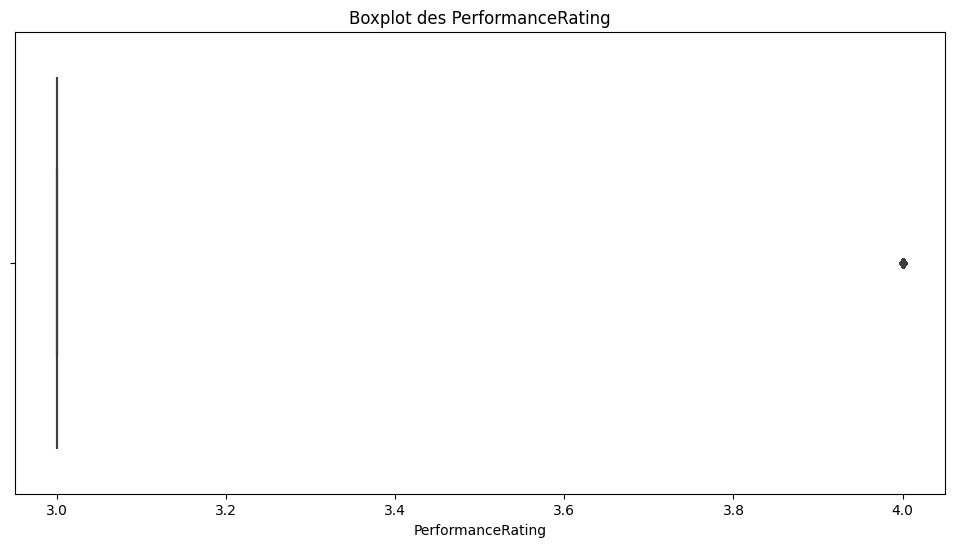

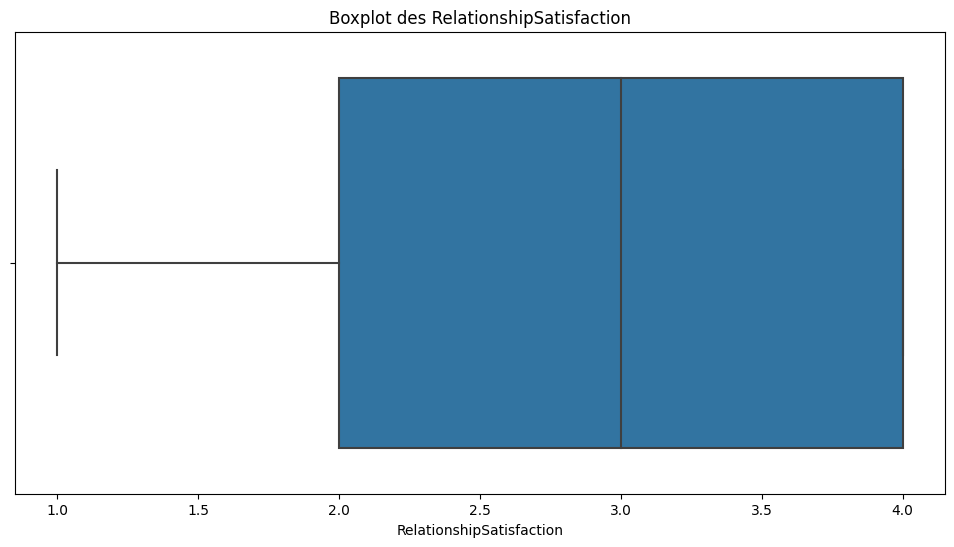

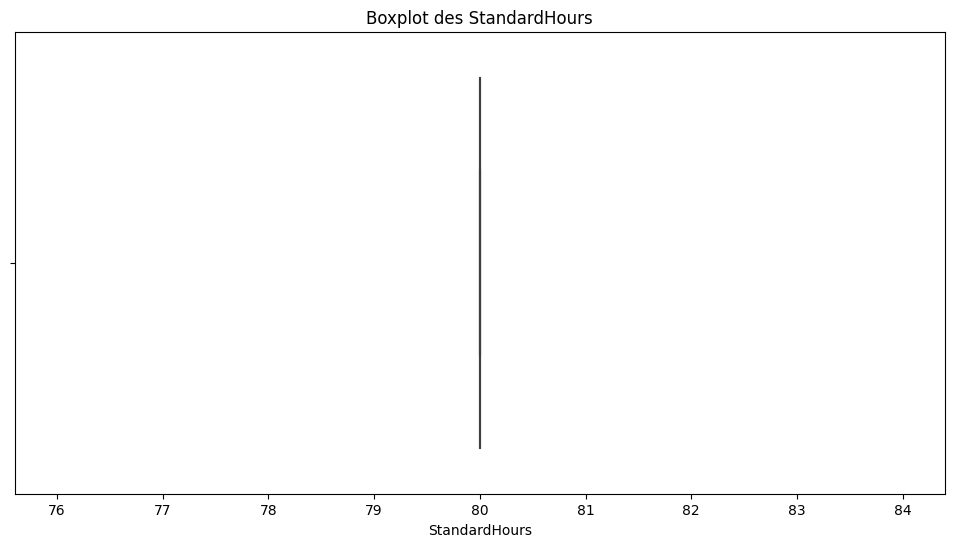

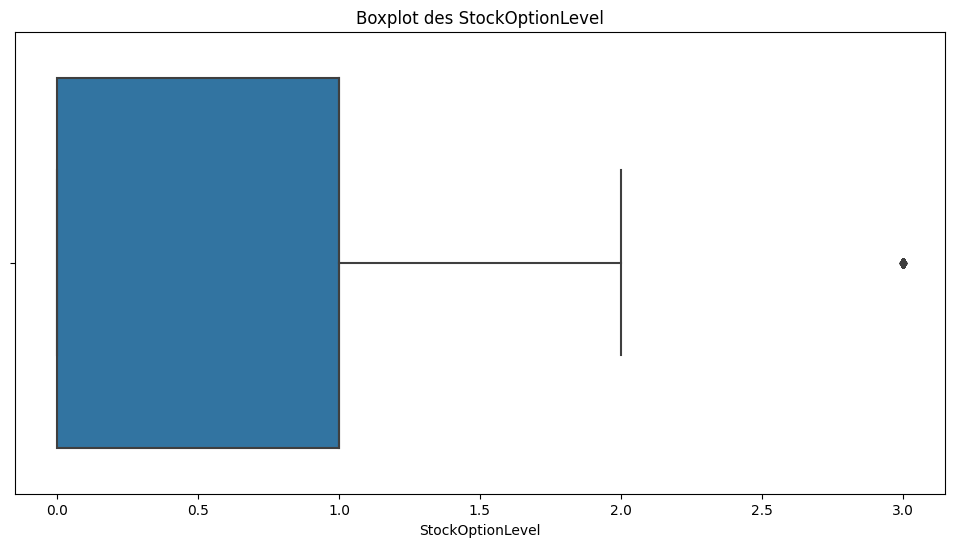

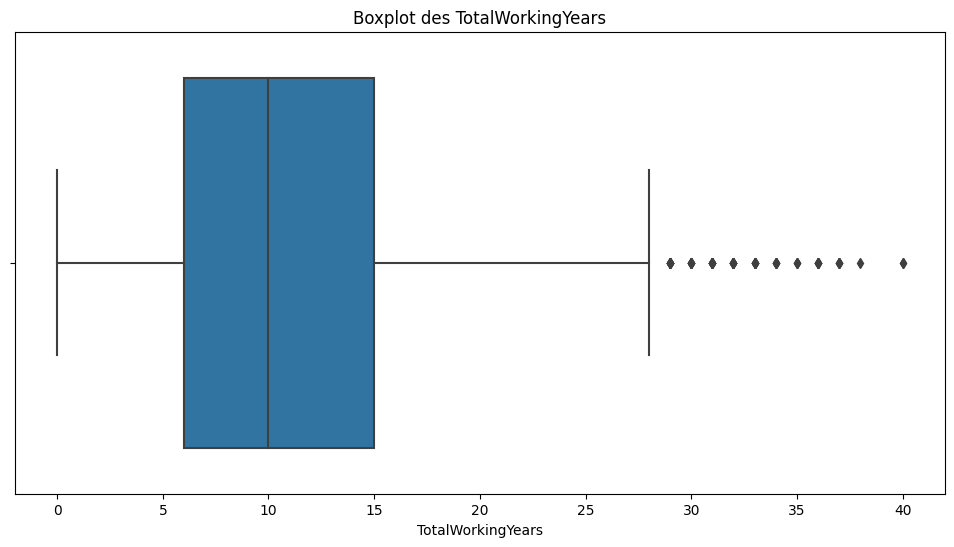

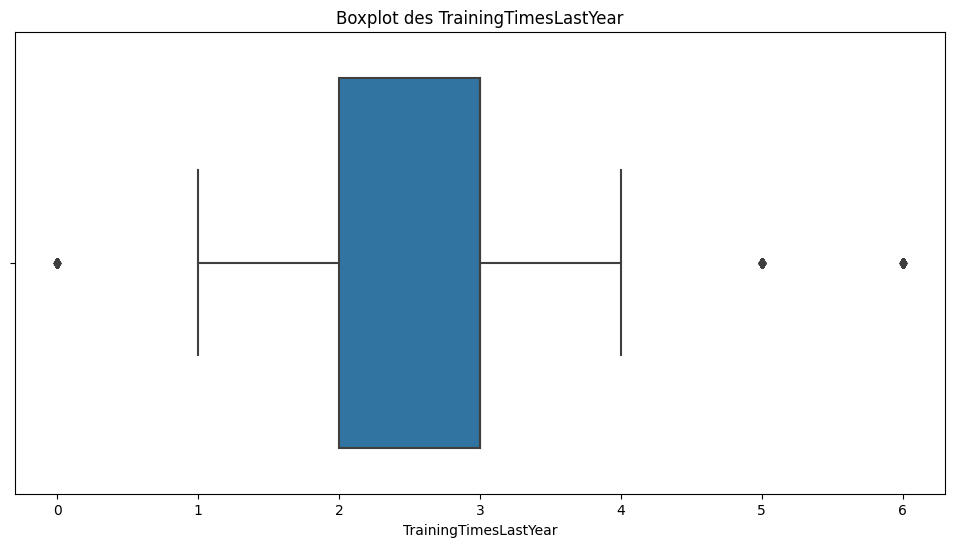

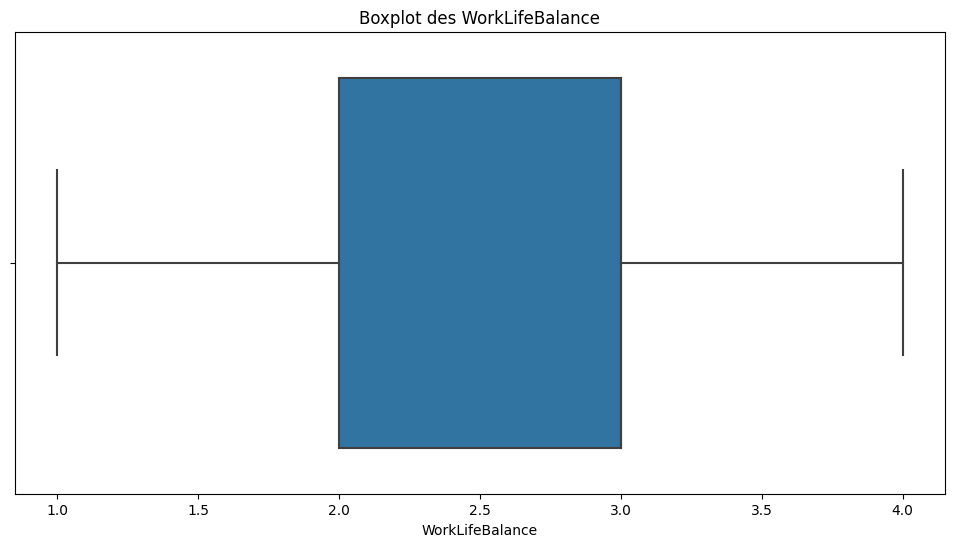

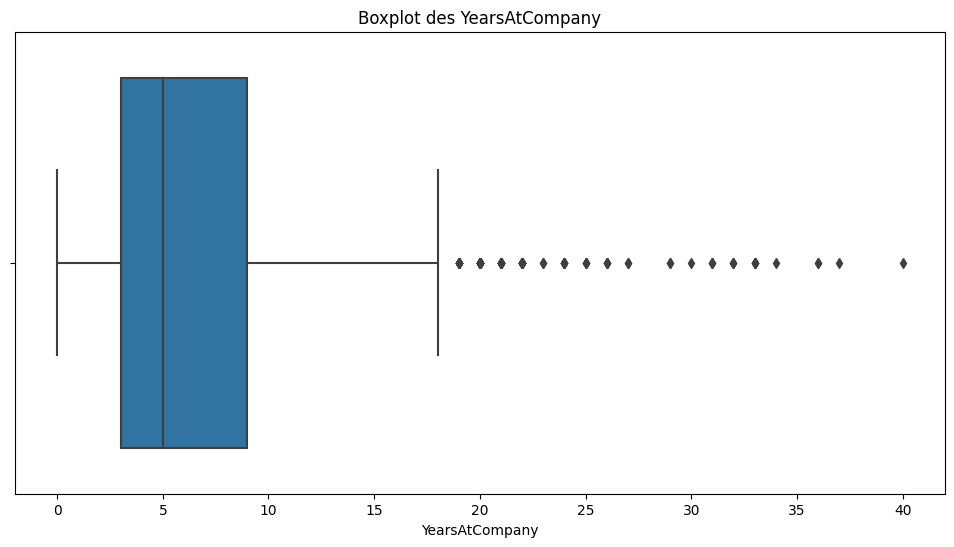

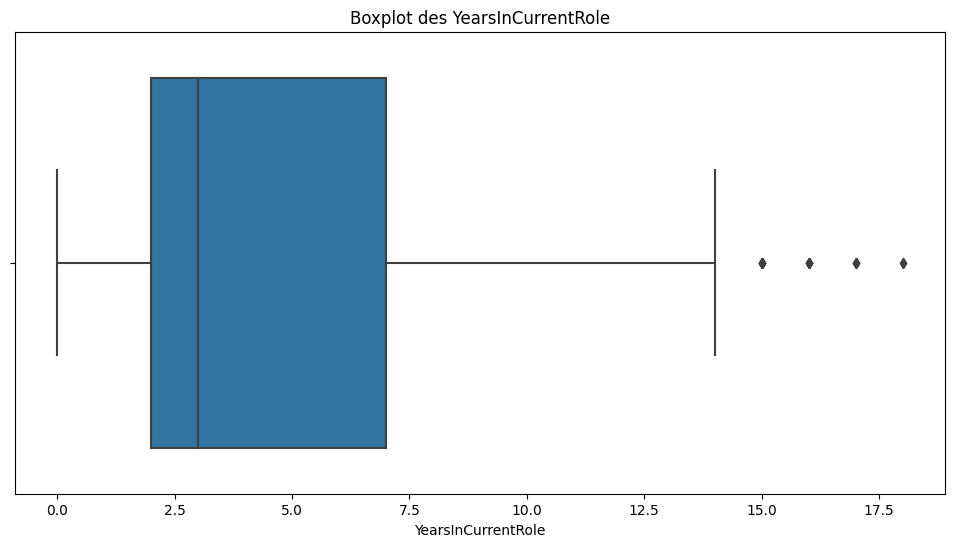

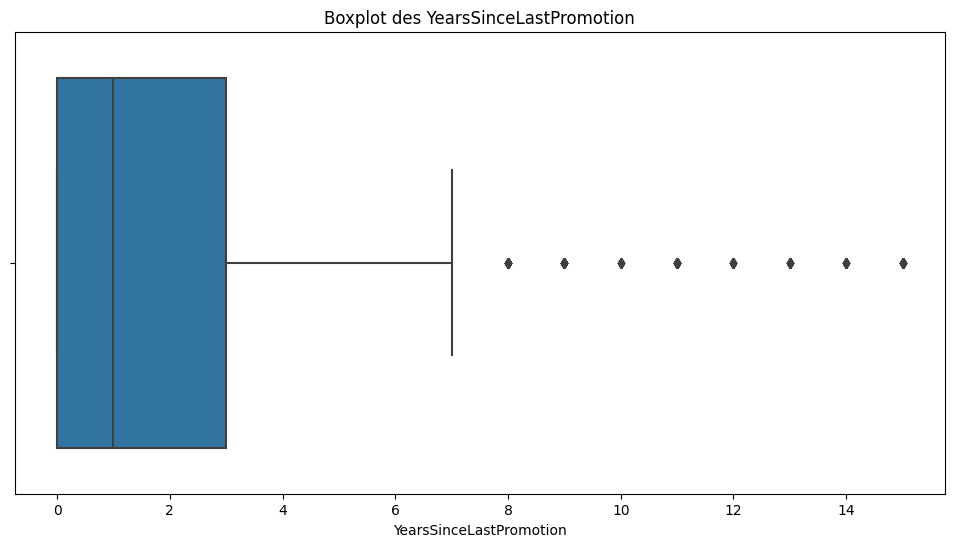

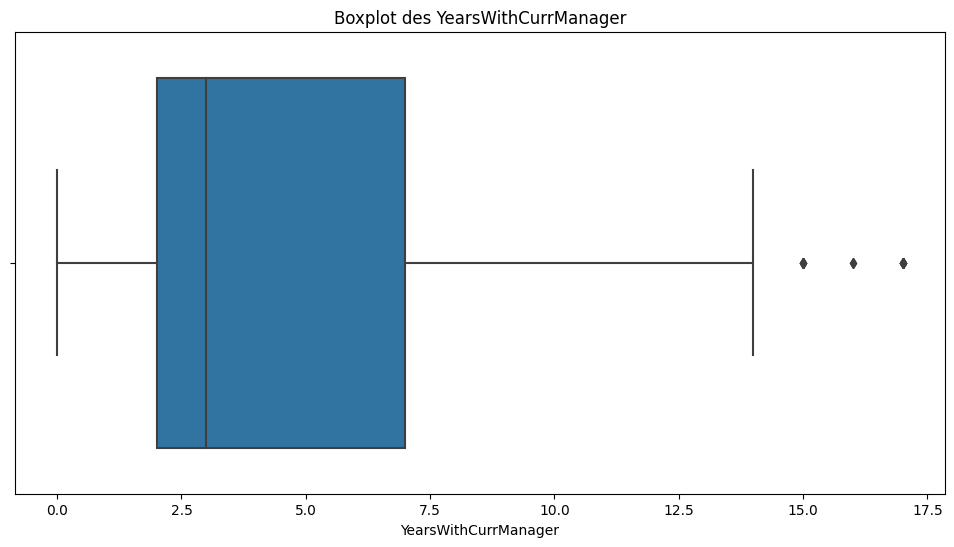

In [15]:
for feat in num_features :
    detect_outliers(data_pur, feat)

In [18]:
def outliers(data, features):
    outliers_indices = {}
    for column in features:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        outliers_indices[column] = outliers
    return outliers_indices

In [19]:
outliers_indices = outliers(data_pur,num_features)

In [21]:
total_rows = len(data_pur)
outliers_count = len(set(np.concatenate(list(outliers_indices.values()))))
outliers_percentage = (outliers_count / total_rows) * 100

print(f"Total of the outliers : {outliers_count}")
print(f"Pourcentage of outliers : {outliers_percentage:.2f}%")

# Affichage des colonnes contenant des outliers et leurs indices
outliers_indices

Total of the outliers : 691
Pourcentage of outliers : 47.01%


{'Age': Index([], dtype='int64'),
 'DailyRate': Index([], dtype='int64'),
 'DistanceFromHome': Index([], dtype='int64'),
 'Education': Index([], dtype='int64'),
 'EmployeeCount': Index([], dtype='int64'),
 'EmployeeNumber': Index([], dtype='int64'),
 'EnvironmentSatisfaction': Index([], dtype='int64'),
 'HourlyRate': Index([], dtype='int64'),
 'JobInvolvement': Index([], dtype='int64'),
 'JobLevel': Index([], dtype='int64'),
 'JobSatisfaction': Index([], dtype='int64'),
 'MonthlyIncome': Index([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,
        ...
        1277, 1330, 1331, 1348, 1351, 1374, 1377, 1401, 1437, 1443],
       dtype='int64', length=114),
 'MonthlyRate': Index([], dtype='int64'),
 'NumCompaniesWorked': Index([   4,   38,   50,   95,  105,  122,  194,  198,  208,  245,  287,  290,
         334,  371,  372,  385,  393,  401,  440,  447,  456,  525,  541,  544,
         551,  575,  597,  617,  623,  660,  714,  717,  756,  770,  779,  789,
         816,  837, 

The outliers representent 47% of my dataset so, it no interessant to delete it. So, I will work with it, beacuse they are sensful

### Let's see the duplicated_values 

In [22]:
duplicated_rows = data_pur[data_pur.duplicated()]

# Calcul du nombre total de duplications
num_duplicated_rows = duplicated_rows.shape[0]

# Calcul du pourcentage de duplications
total_rows = data_pur.shape[0]
duplicated_percentage = (num_duplicated_rows / total_rows) * 100

print(f"Total of duplicated lines : {num_duplicated_rows}")
print(f"Pourcentage of duplicated lines : {duplicated_percentage:.2f}%")

# Affichage des lignes dupliquées
duplicated_rows

Total of duplicated lines : 0
Pourcentage of duplicated lines : 0.00%


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


No duplicated values

### Bivariare analysis

In [62]:
# Function to plot realtion between two features cat_features(target=Attrition and others)
def GraphBivariate(data,var,features):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=var, hue=features)
    plt.xlabel(var)
    plt.ylabel(features)
    plt.title('Relation between two features')
    plt.grid()
    plt.show()


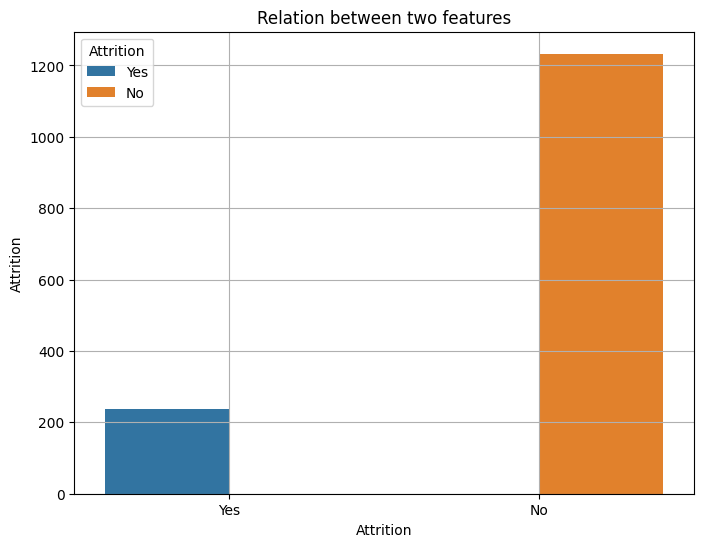

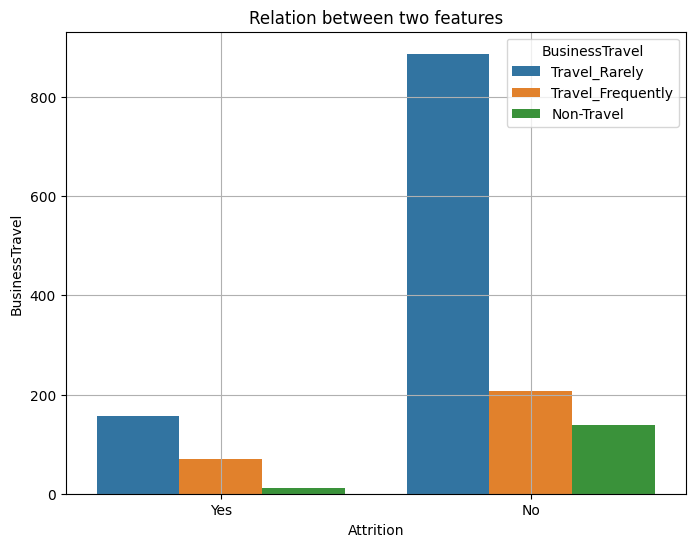

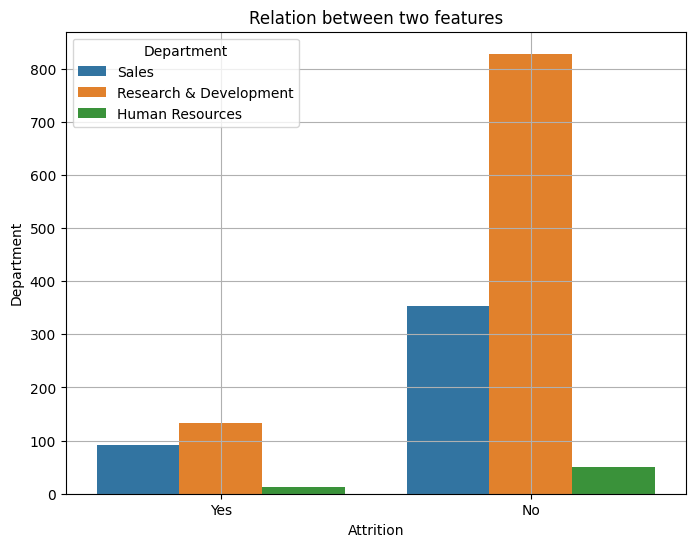

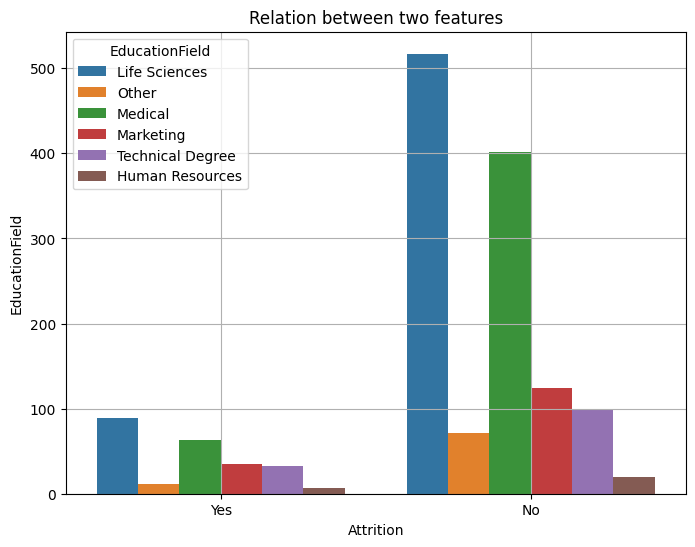

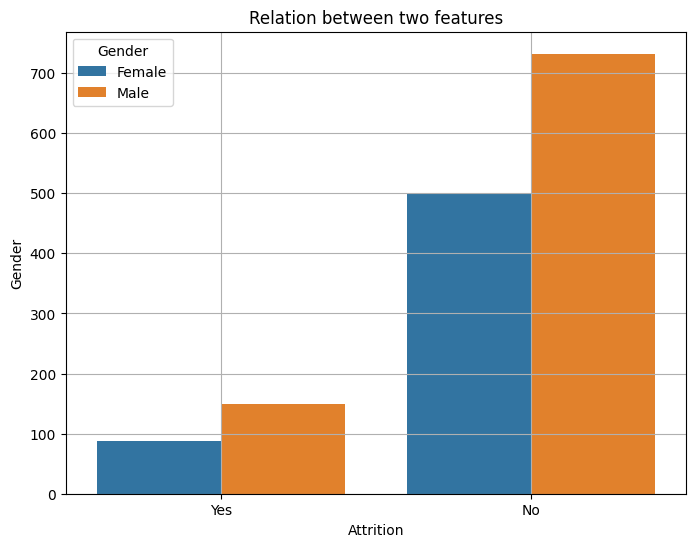

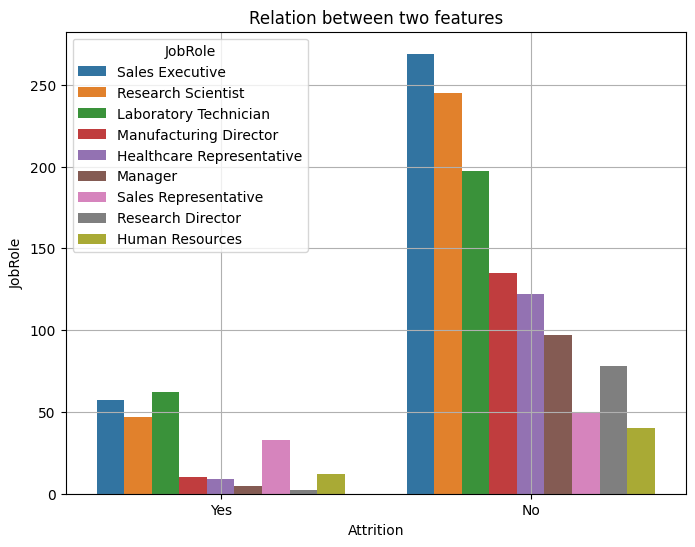

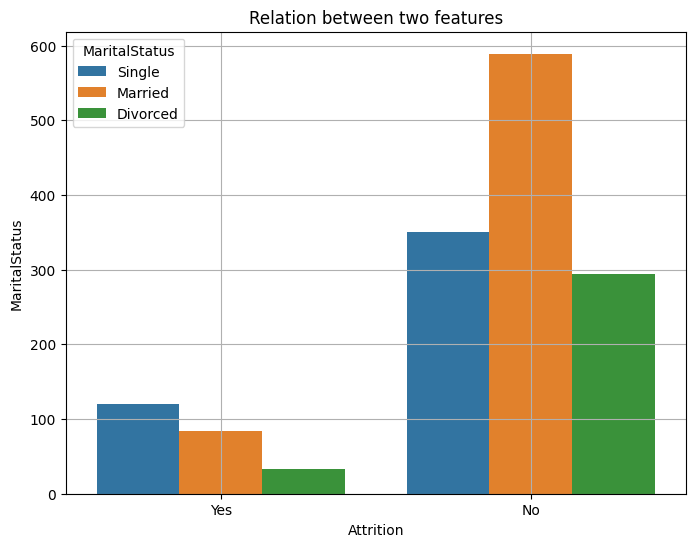

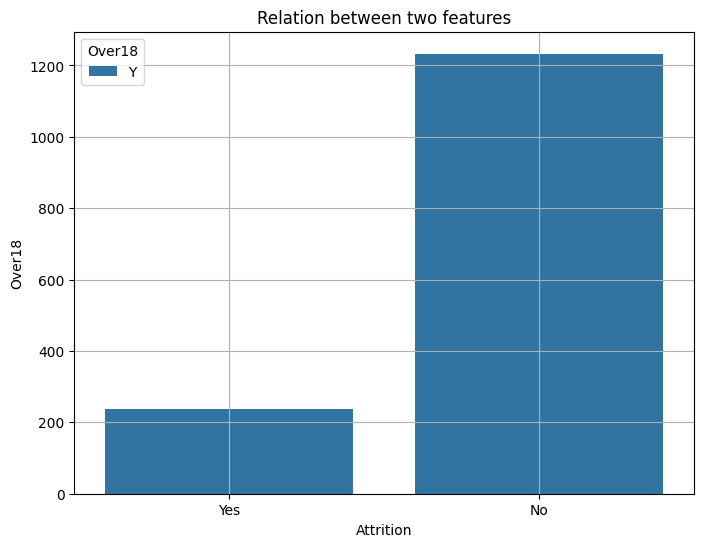

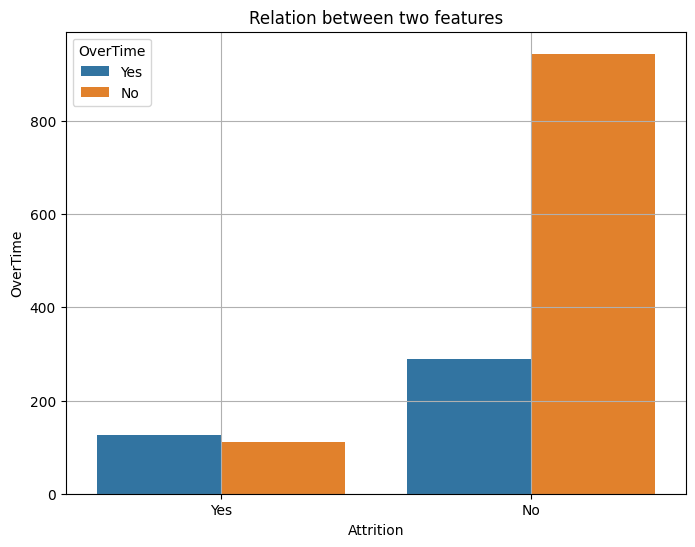

In [63]:
for feat in cat_features:
    GraphBivariate(data_pur,'Attrition',feat)

#### This show us that in all cat_features, the value "No" in the targuet feature represent the most important. We can take this in count for the futur tasks 

### But let make chi2_test to see if there is a relation between theses features(qualitatives)

In [48]:
from scipy.stats import chi2_contingency

In [55]:
def Chi2Test(data,target,features):
    contingency_table = pd.crosstab(data[target], data[features])
    
    chi2_stat, p_value, ddl, expected_freq = chi2_contingency(contingency_table)

    # display results
    print("Statistic_value of Chi2 :", chi2_stat)
    print("P-valeur :", p_value)
    if p_value < 0.005:
        print("Yes, there is an association between theses two features")
    else:
        print("No, association")
    print("Degree of freedom :", ddl)
    print("expected frequency  :\n", expected_freq)
    print('\n')
    print("=================================================\n\n")

In [56]:
for feats in cat_features:
    Chi2Test(data_pur,'Attrition',feats)

Statistic_value of Chi2 : 1462.6145539474094
P-valeur : 0.0
Yes, there is an association between theses two features
Degree of freedom : 1
expected frequency  :
 [[1034.21020408  198.78979592]
 [ 198.78979592   38.21020408]]




Statistic_value of Chi2 : 24.182413685655174
P-valeur : 5.608614476449931e-06
Yes, there is an association between theses two features
Degree of freedom : 2
expected frequency  :
 [[125.81632653 232.34081633 874.84285714]
 [ 24.18367347  44.65918367 168.15714286]]




Statistic_value of Chi2 : 10.79600732241067
P-valeur : 0.004525606574479633
Yes, there is an association between theses two features
Degree of freedom : 2
expected frequency  :
 [[ 52.84285714 806.06326531 374.09387755]
 [ 10.15714286 154.93673469  71.90612245]]




Statistic_value of Chi2 : 16.024674119585423
P-valeur : 0.006773980139025222
No, association
Degree of freedom : 5
expected frequency  :
 [[ 22.64693878 508.29795918 133.36530612 389.19183673  68.77959184
  110.71836735]
 [  4.35306122

##### features_associated_with_target=['WorkLifeBalance','EnvironmentSatisfaction','EducationField','BusinessTravel','Gender','RelationshipSatisfaction']

### Analysis between cat_features(target) and num_features

##### Graphics

In [58]:
def anovaBox(data,var1,var2):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=var1, y=var2)
    plt.xlabel(f'target {var1}')
    plt.ylabel(f'features {var2}')
    plt.title('Relation between two features')
    plt.show()

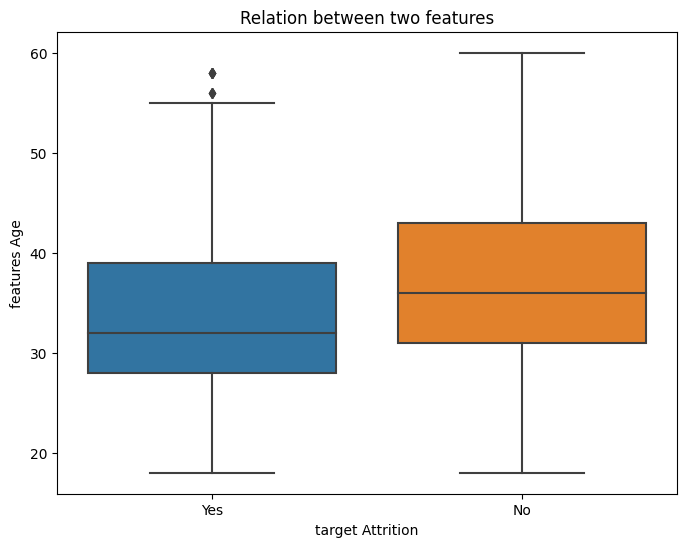

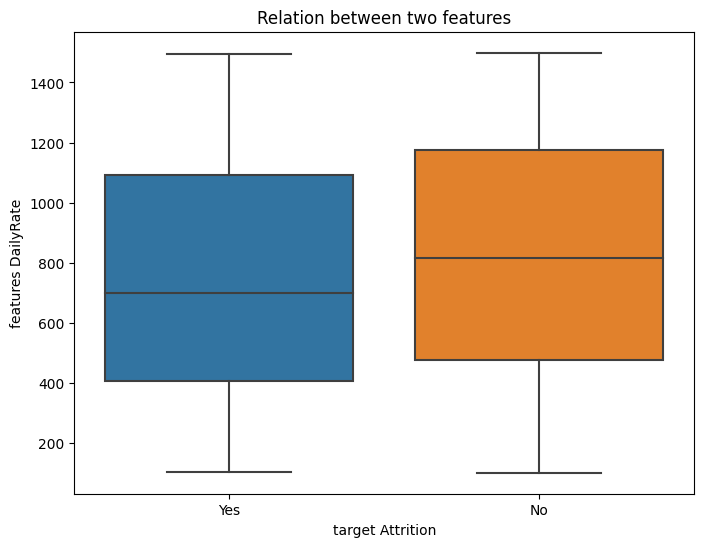

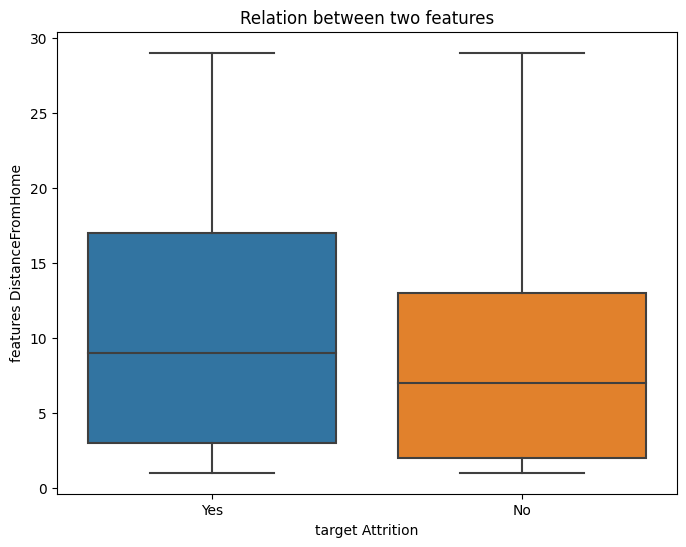

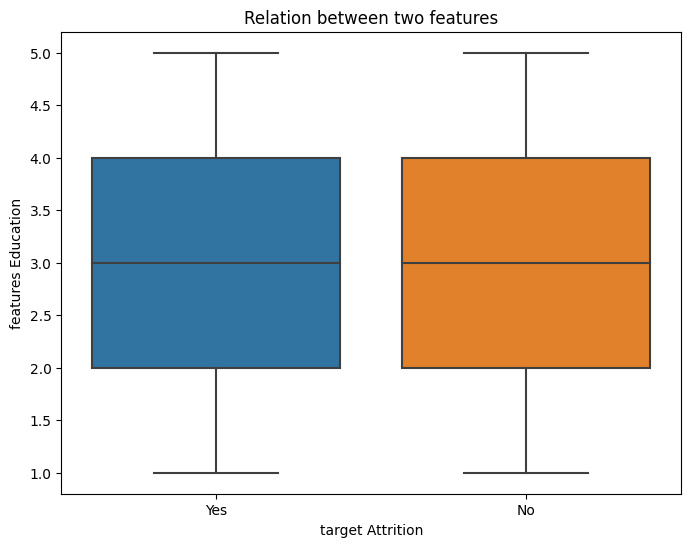

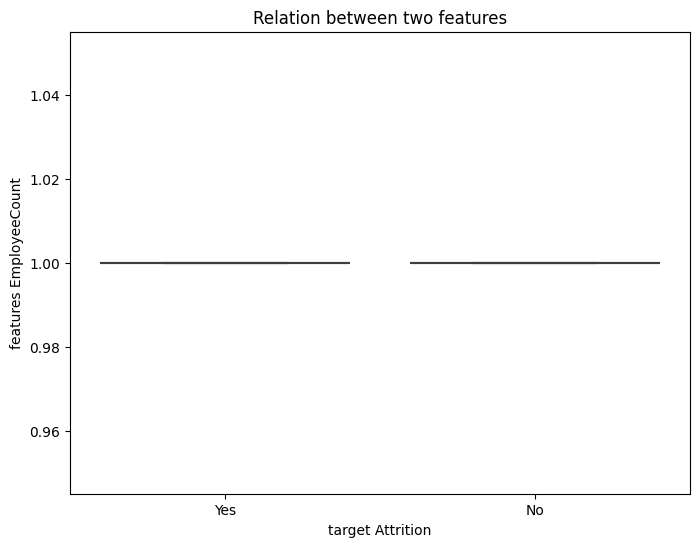

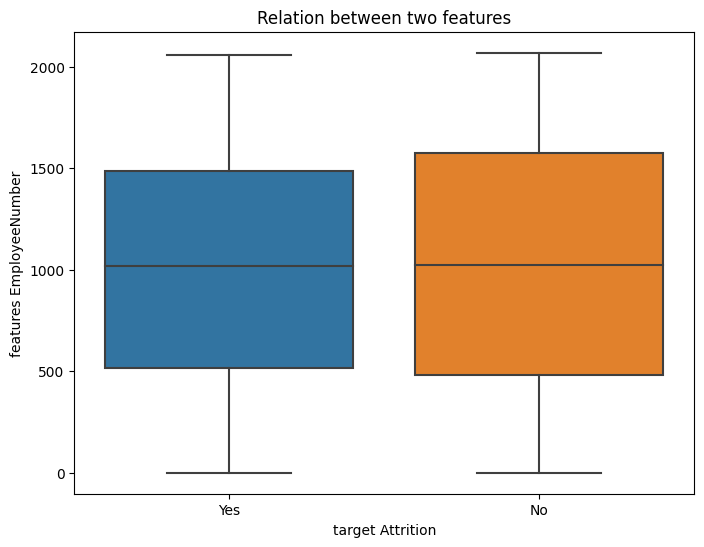

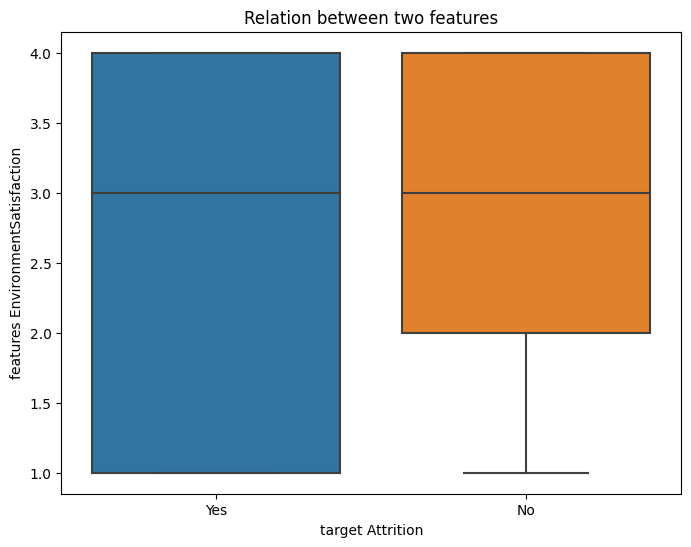

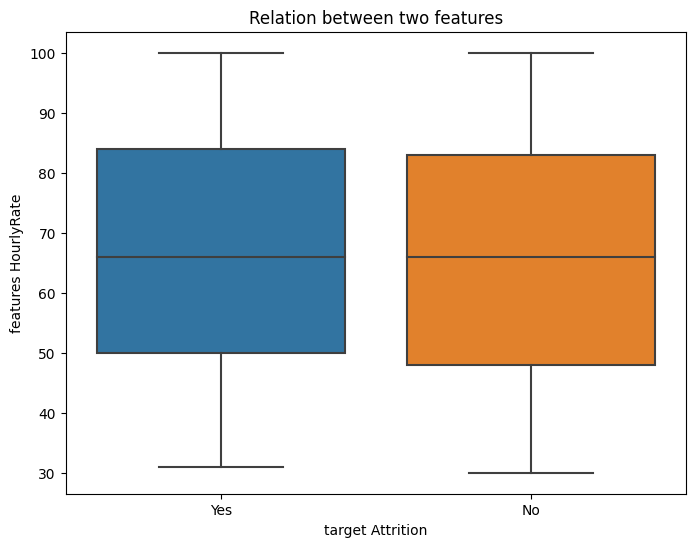

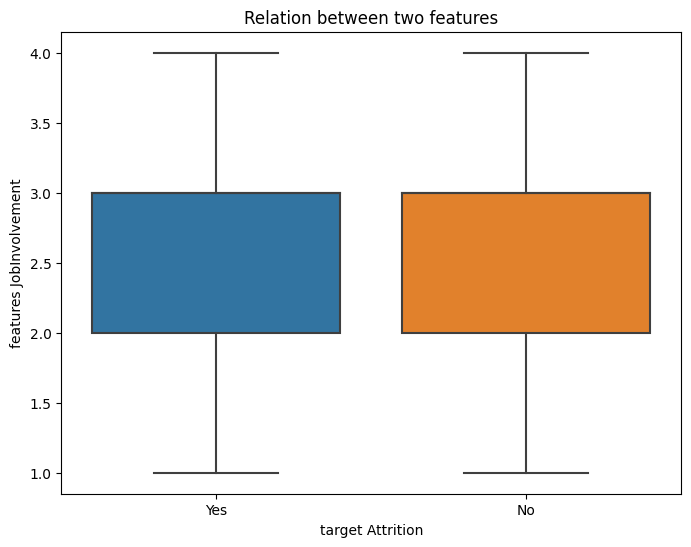

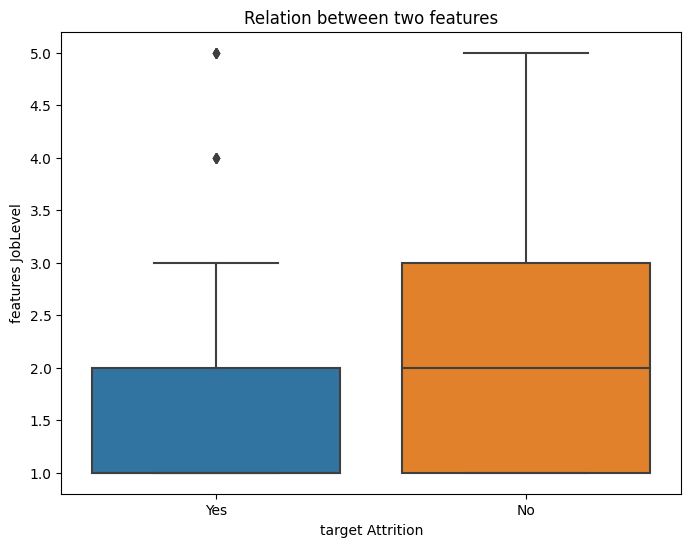

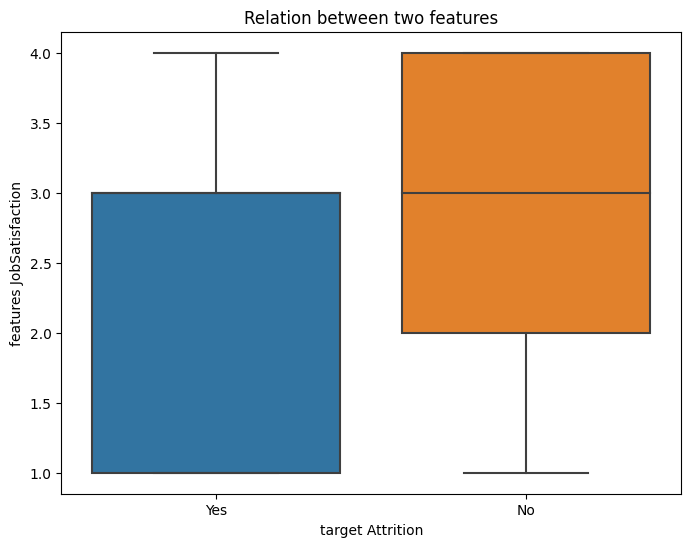

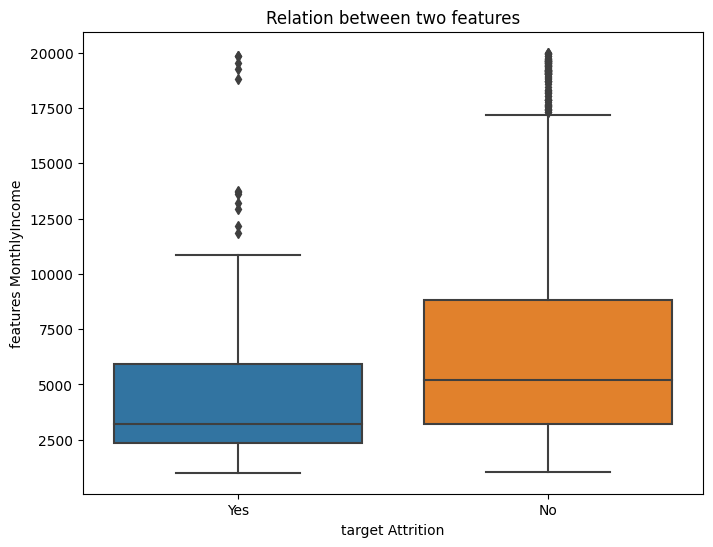

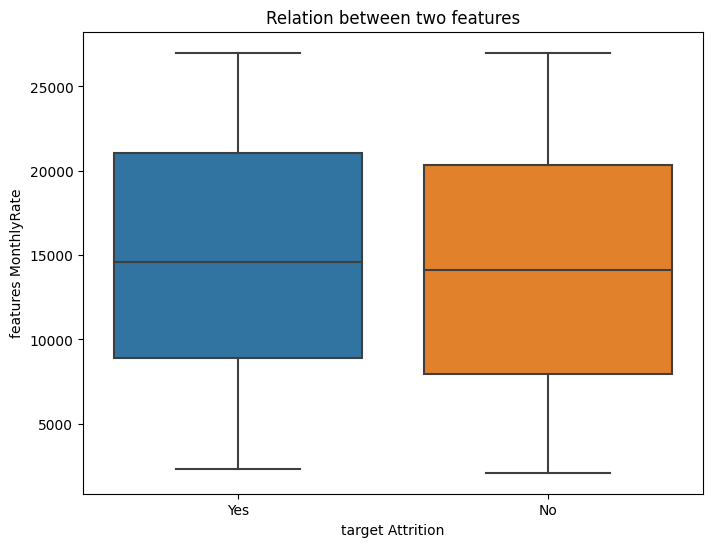

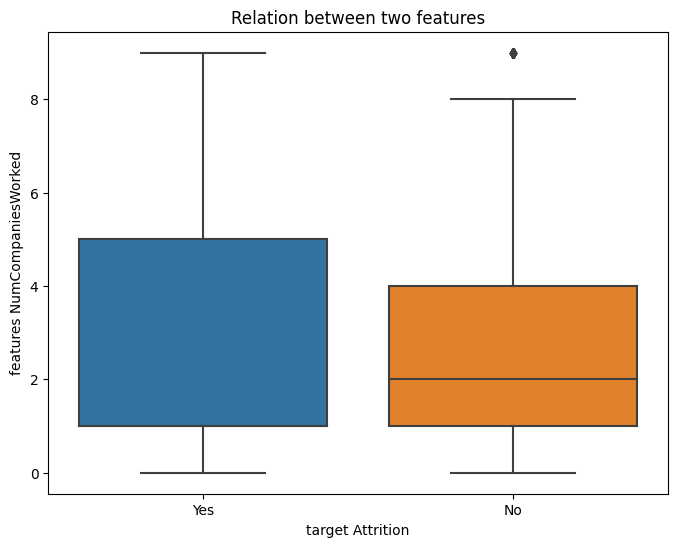

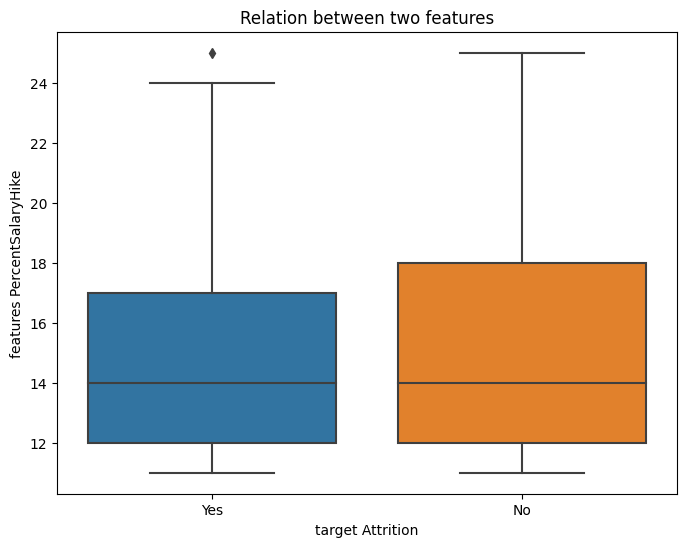

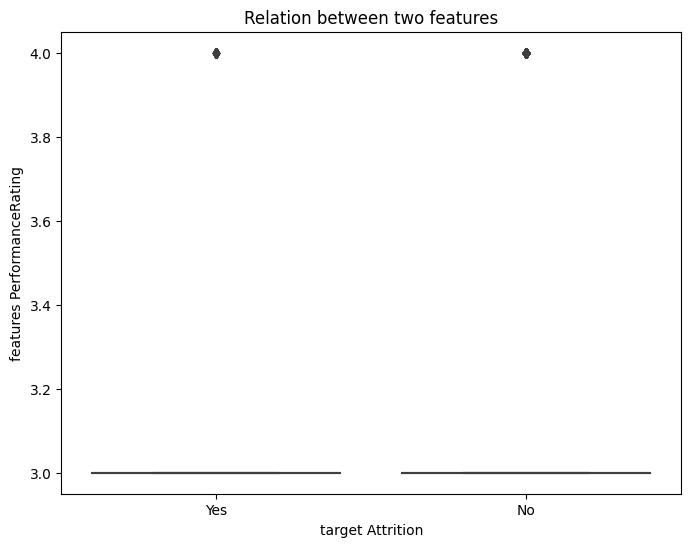

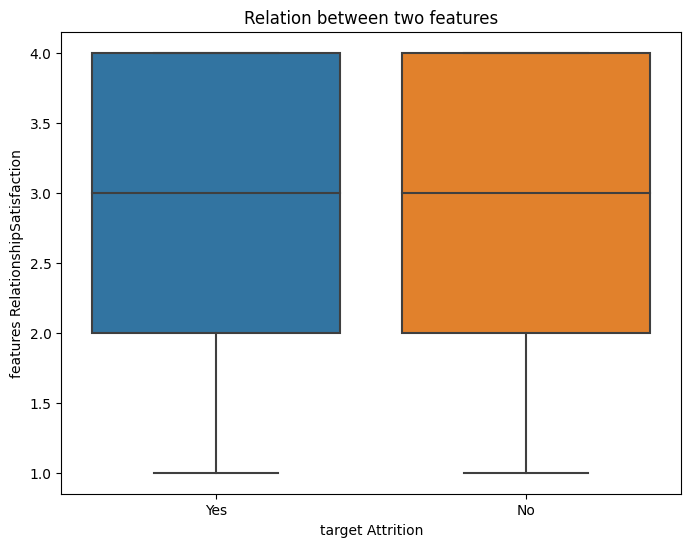

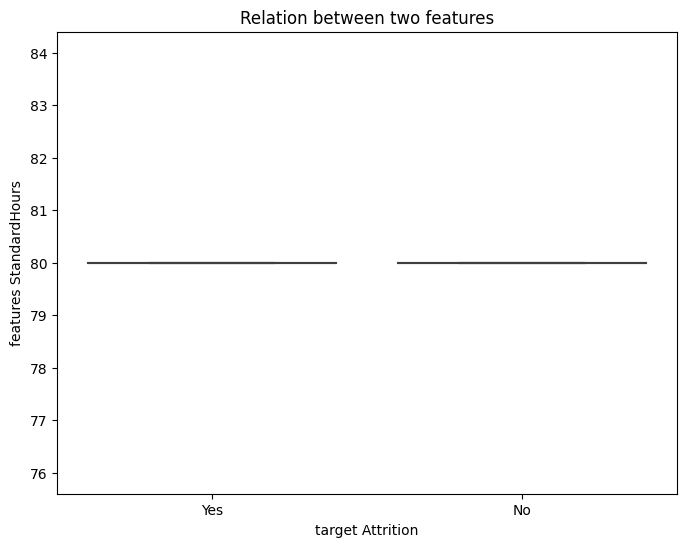

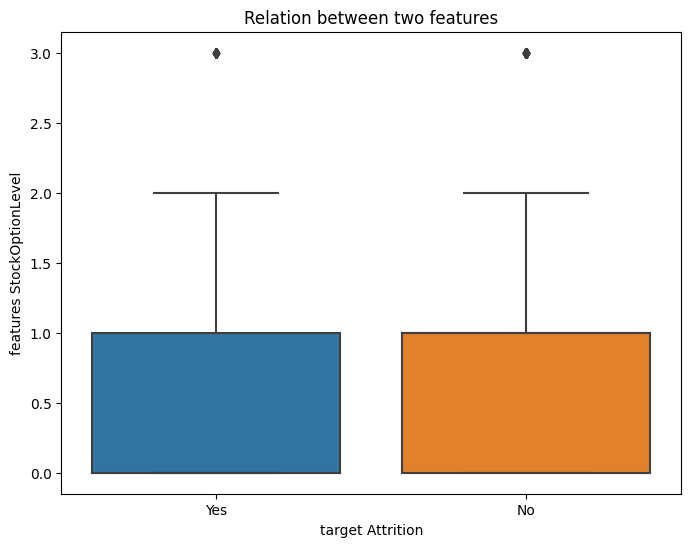

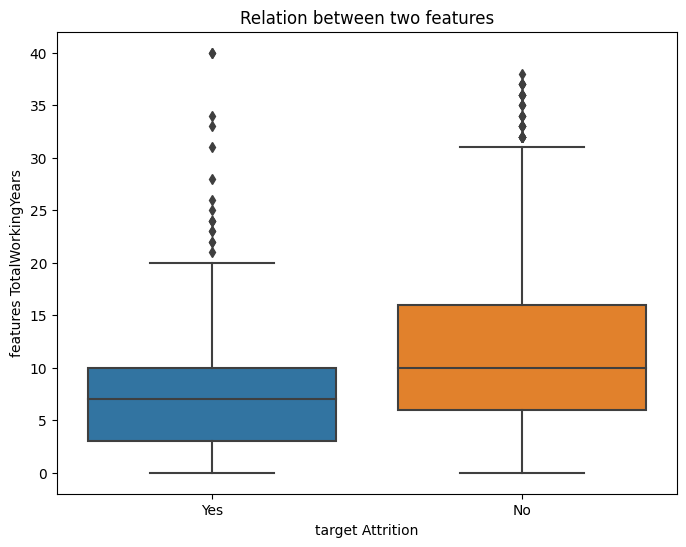

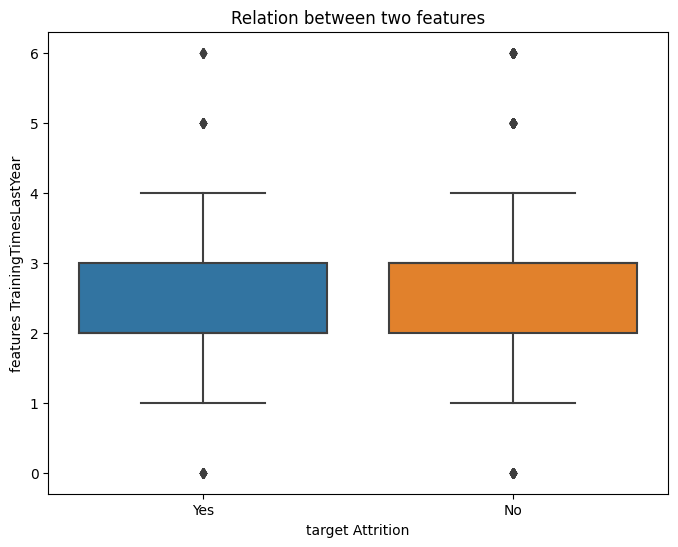

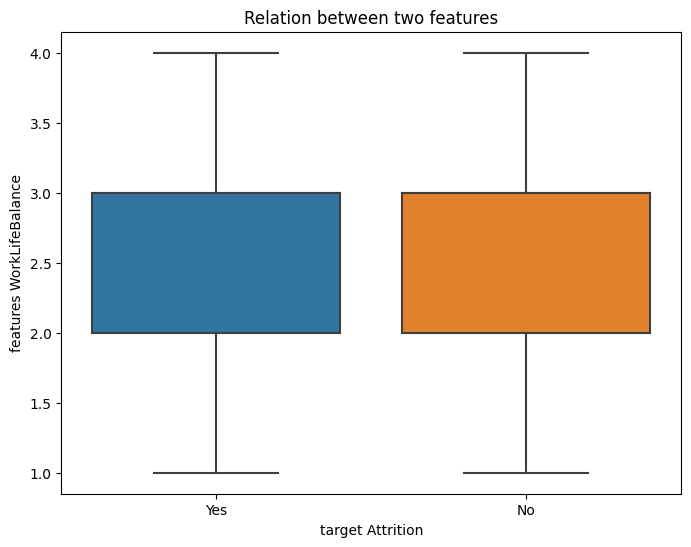

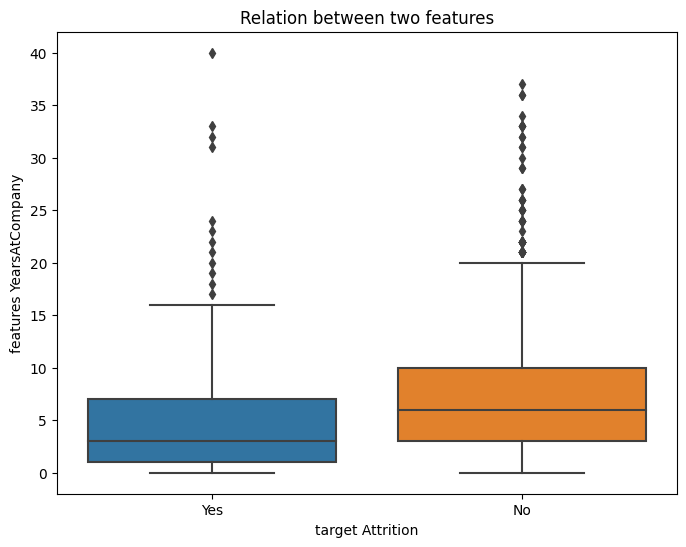

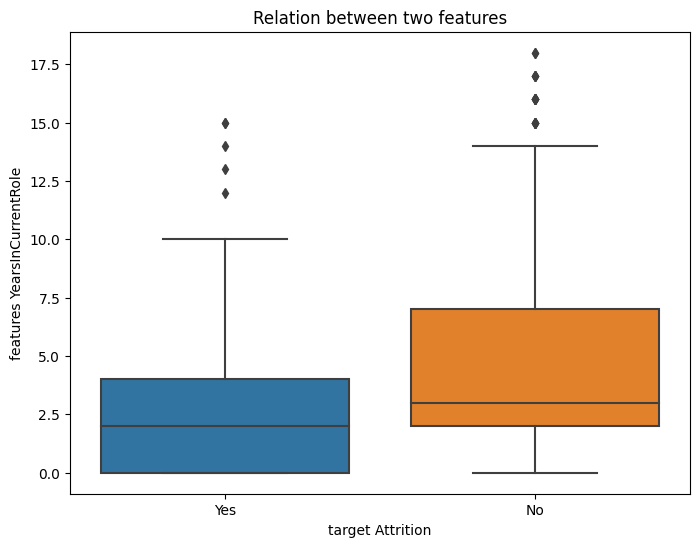

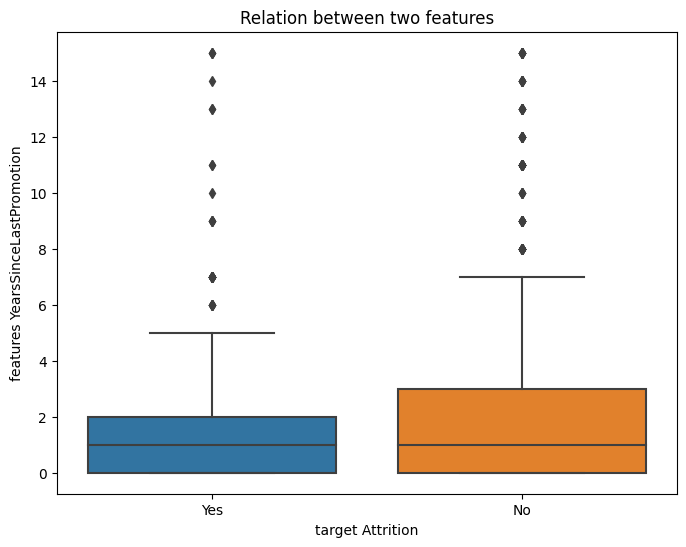

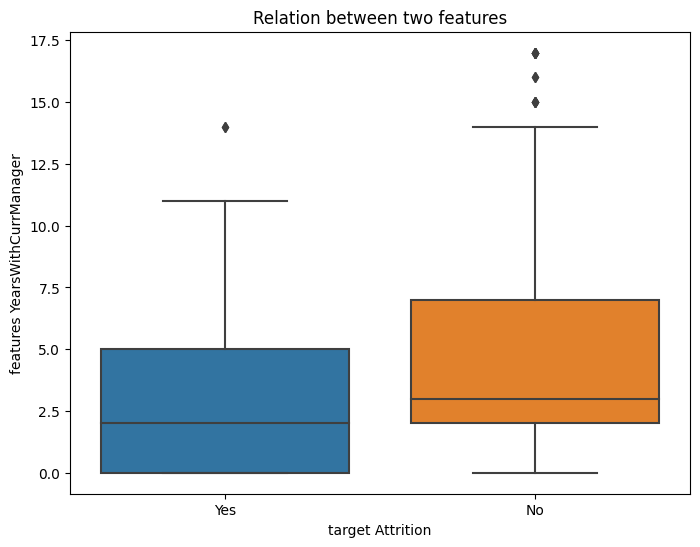

In [59]:
for feats in num_features:
    anovaBox(data_pur,'Attrition',feats)

# 2- Data encoding

### We gonna transforme cat_features to numreic values in order to allow algo learn easily

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [83]:
for i in cat_features:
    data_pur[i]=encoder.fit_transform(data_pur[i])

In [85]:
data_pur.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,1,13,...,2,80,2,17,3,2,7,7,7,7


# 3-Data Labelling

### Split the data in 02 parts: target=y and X= features

In [88]:
Y= data_pur['Attrition']
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [89]:
X=data_pur.drop(columns=['Attrition'])

In [90]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [91]:
print("The shape of features=",X.shape)
print("The shape of target= ",Y.shape)

The shape of features= (1470, 34)
The shape of target=  (1470,)


## Saving the dataset

In [92]:
data_pur.to_csv('cleaned_encoded_data.csv', index=False)